
In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

Context
Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder

State the null hypothesis
State the alternate hypothesis
What is the significance level
What are the degrees of freedom of model, error terms, and total DoF
Data was collected randomly and provided to you in the table as shown: link to the image - Data

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin

In [35]:
data = pd.read_excel("anova_lab_data.xlsx")

In [36]:
data = data.rename(columns = {'Power ': 'Power'})

In [45]:
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


First, we need to set the hypothesis:
- H0: The power of the plasma beam has no effect on the etching rate by the machine.
- Ha: The power of the plasma beam has effect on the etching rate by the machine.

Second, we will set the signifiance level, α = 0.05. 
If p<=α, we will reject H0. 

In [37]:
avg = data.groupby('Power')['Etching Rate'].mean()
std = data.groupby('Power')['Etching Rate'].std()
n = data.groupby('Power')['Etching Rate'].count()

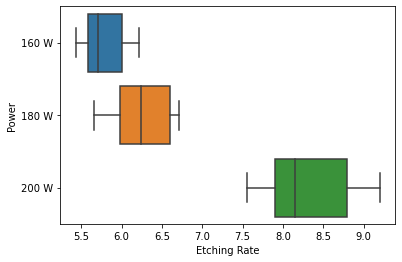

In [44]:
#As your can see the etching rates are different amond different power. 
sns.boxplot(y = "Power", x = "Etching Rate", data = data)
plt.show()

In [51]:
pingouin.anova(data=data, between = "Power", dv = "Etching Rate" )

,Source,ddof1,ddof2,F,p-unc,np2
0,Power,2,12,36.878955,0.000008,0.860071


p value is smaller than α , we reject the null hypothesis. 

In [52]:
help(pingouin.anova)

Help on function anova in module pingouin.parametric:

anova(data=None, dv=None, between=None, ss_type=2, detailed=False, effsize='np2')
    One-way and *N*-way ANOVA.
    
    Parameters
    ----------
    data : :py:class:`pandas.DataFrame`
        DataFrame. Note that this function can also directly be used as a
        Pandas method, in which case this argument is no longer needed.
    dv : string
        Name of column in ``data`` containing the dependent variable.
    between : string or list with *N* elements
        Name of column(s) in ``data`` containing the between-subject factor(s).
        If ``between`` is a single string, a one-way ANOVA is computed.
        If ``between`` is a list with two or more elements, a *N*-way ANOVA is
        performed.
        Note that Pingouin will internally call statsmodels to calculate
        ANOVA with 3 or more factors, or unbalanced two-way ANOVA.
    ss_type : int
        Specify how the sums of squares is calculated for *unbalanced*